In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Matplotlib

In [2]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


### Simple Line plot for daily opening price

c:\program files\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


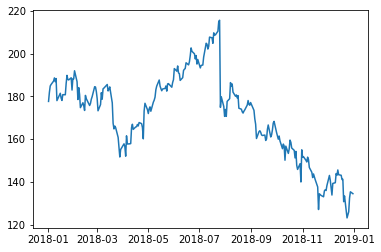

In [3]:
plt.plot(fb.index, fb.open)

### Scatter plot of high and low prices 

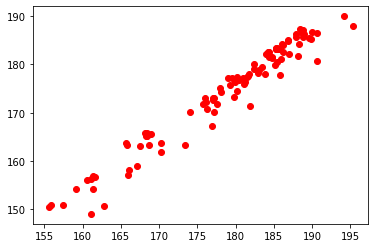

In [4]:
plt.plot('high', 'low', 'ro', data=fb.head(100)) 
#r is red, o is dots. colors = {blue:b, black:k, red:r, green:g, magenta:m, cyan:c}
#markers = {solid line: -, dashed line: --, point: ., solid line with points: -., dotted line: :, dot dash line: -.}

### Histogram

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <a list of 10 Patch objects>)

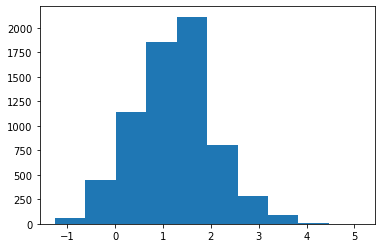

In [5]:
quakes = pd.read_csv('data/earthquakes.csv')
plt.hist(quakes.loc[(quakes.magType=='ml'), 'mag'])

#### Plot components

In [6]:
#creating figure object
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

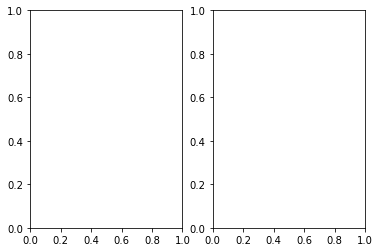

In [7]:
#create multiple plots in same fig
#plt.subplots(nrow, ncol) returns figure and axes objects
fig, axes = plt.subplots(1, 2)

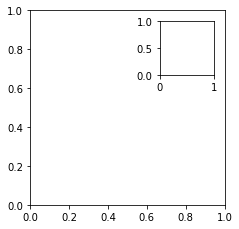

In [8]:
#Alternative for subplots() is add_axes([left, bottom, width, height])
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])

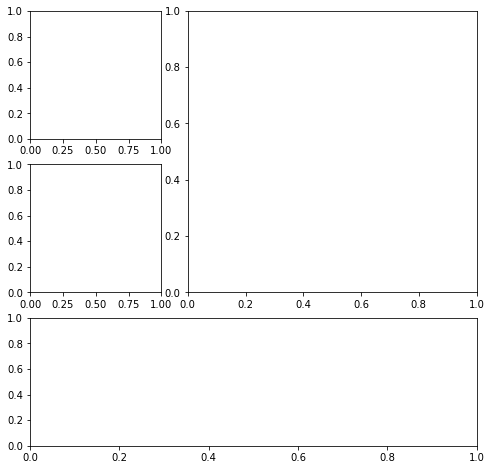

In [9]:
#Subplots of different sizes
#add_gridspec()
fig = plt.figure(figsize=(8, 8))
gs = fig.add_gridspec(3, 3) #matrix of 3x3 [[0,1,2],[0,1,2]]
topLeft = fig.add_subplot(gs[0, 0]) #row 0 col 0
midLeft = fig.add_subplot(gs[1, 0]) #row 1 col 0
topRight = fig.add_subplot(gs[:2, 1:]) # row 0,1 col 1,2 
bottom = fig.add_subplot(gs[2, :]) #row 2 all columns

#use gs similar to python list slicing to select the slot for subplot

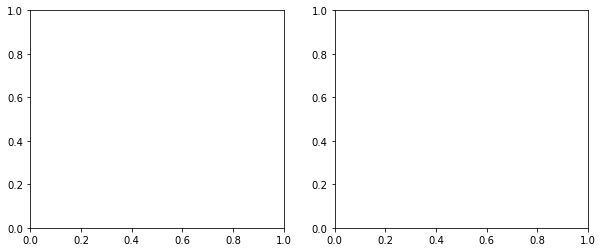

In [10]:
#figsize argument can be passed to plot and subplots to change the figsize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

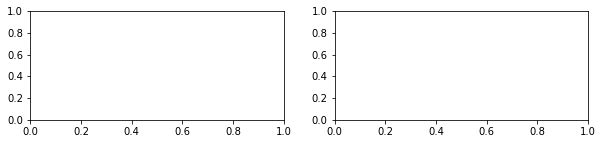

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 2))

## Plotting `series` and `Data Frames`

plot() can be directly used on series and dataframe of pandas
paramets:
kind, x, y, ax, subplots-(Bool), layout-((row, col)), figsize-((width, height)), title, legend(Bool), label, style, color
logx/logy/loglog (Bool - For log scales), xticks/yticks, xlim/ylim, sharex/sharey, fontsize, grid(Bool)

### Time based plotting

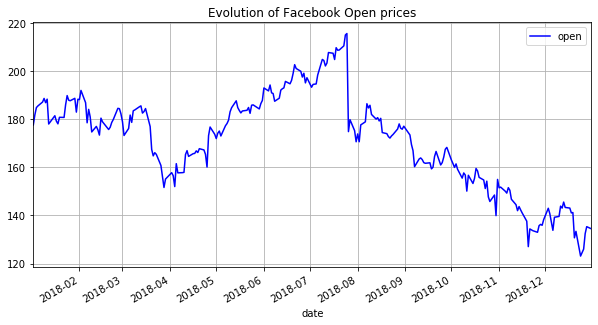

In [12]:
fb.open.plot(kind='line', figsize=(10, 5), style='b-', title='Evolution of Facebook Open prices', grid=True, legend=True)

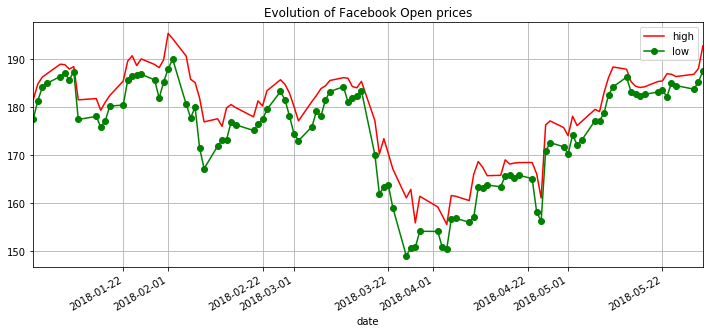

In [13]:
#Multiple variables, Same plot
fb[['high', 'low']]['2018-01':'2018-05'].plot(kind='line', figsize=(12, 5), style=['r-', 'go-'], sharey=True,
                         title='Evolution of Facebook Open prices', grid=True, legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001851783AB08>,
      dtype=object)

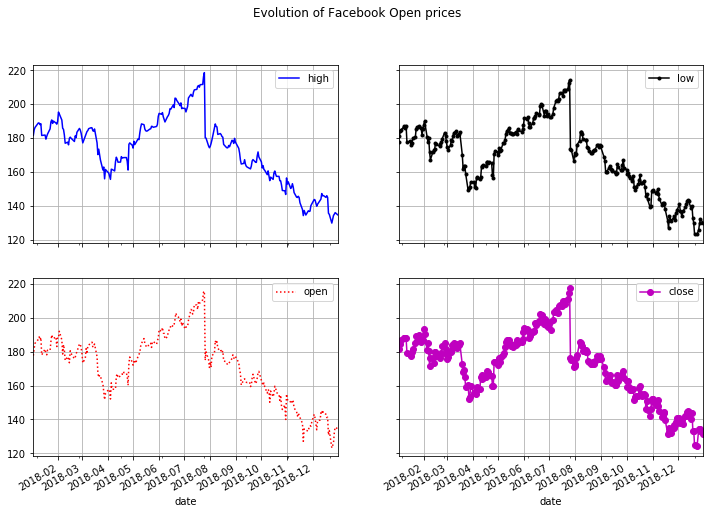

In [14]:
#Multiple variables, subplots
fb[['high', 'low', 'open', 'close']].plot(kind='line', figsize=(12, 8), subplots=True, layout=(2,2), 
                                          style=['b-', 'k.-', 'r:', 'mo-'], sharey=True,
                         title='Evolution of Facebook Open prices', grid=True, legend=True)

### Scatter Plot

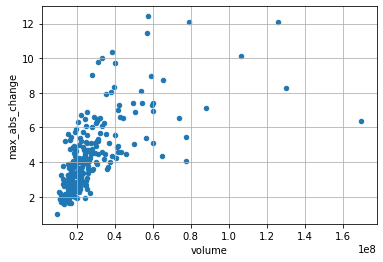

In [15]:
fb.assign(max_abs_change = fb.high-fb.low).plot(kind='scatter', x='volume', y='max_abs_change', grid=True)

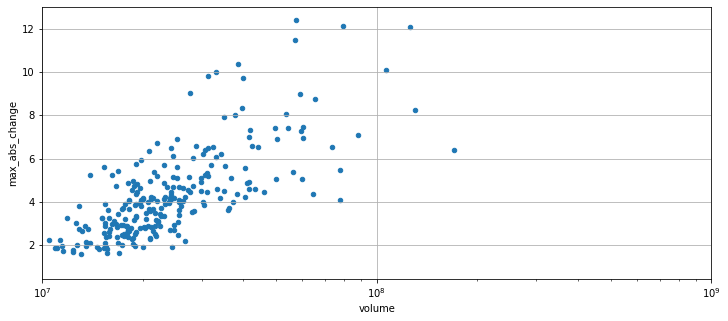

In [16]:
#Taking a log of volume for better visualization
fb.assign(max_abs_change = fb.high-fb.low).plot(kind='scatter', x='volume', y='max_abs_change', figsize=(12,5),
                                                logx=True, xlim=(10e6,10e8), grid=True)

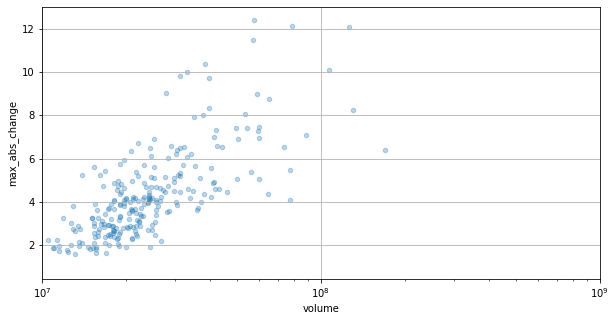

In [17]:
#See the overlapping
#Taking a log of volume for better visualization
fb.assign(max_abs_change = fb.high-fb.low).plot(kind='scatter', x='volume', y='max_abs_change', figsize=(10,5),
                                                logx=True, xlim=(10e6,10e8), alpha=0.30, grid=True)

### Histograms

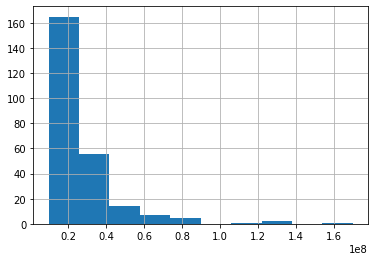

In [18]:
fb.volume.hist()

Text(0.5, 1.0, 'Facebook Volume Traded')

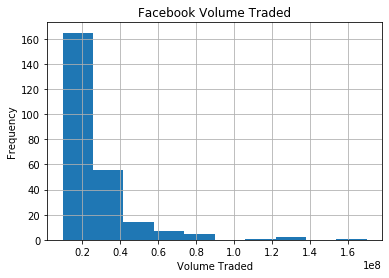

In [19]:
fb.volume.plot(kind='hist', grid=True)
plt.xlabel('Volume Traded')
plt.ylabel('Frequency')
plt.title('Facebook Volume Traded')


##### Multiple Histograms in one fig

Text(0.5, 0, 'Magnitude')

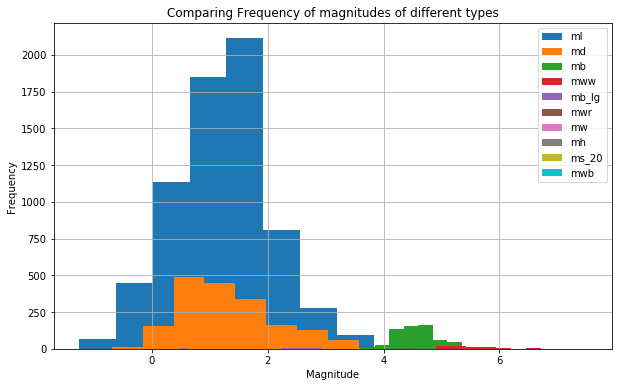

In [20]:
fig, axes = plt.subplots(figsize=(10,6))
for magtype in quakes.magType.unique():
    eq_mag = quakes.query(f'magType == "{magtype}"').mag
    if not eq_mag.empty:
        eq_mag.plot(kind='hist', ax=axes,
                  label=magtype, legend=True,
                  grid=True,
                  title='Comparing Frequency of magnitudes of different types')
plt.xlabel('Magnitude')

#### KDE with Histogram to check the distribution

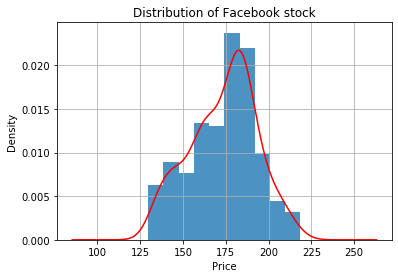

In [21]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.8)
fb.high.plot(ax=ax, kind='kde', color='red')
plt.xlabel('Price')
plt.title('Distribution of Facebook stock')
plt.grid(True)

### Box plot

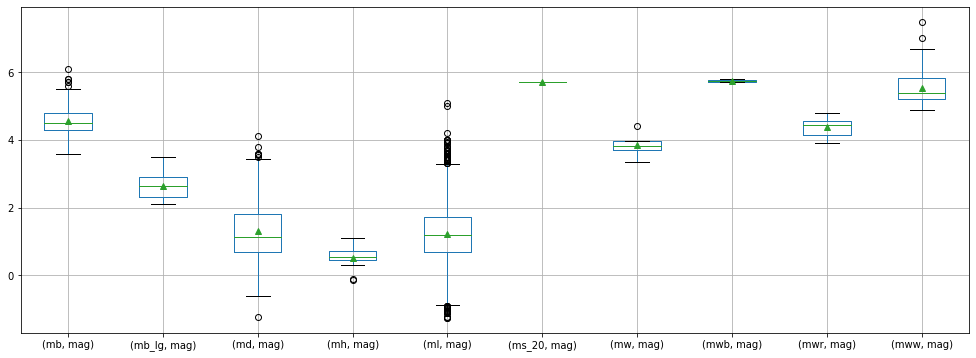

In [22]:
quakes[['magType', 'mag']].groupby('magType').boxplot(figsize=(17,6), subplots=False, showmeans=True)
plt.grid(True)

### Barcharts

Text(0.5, 0, 'Month')

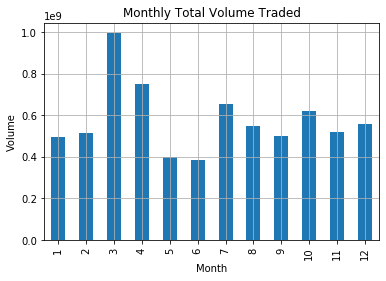

In [23]:
fb.assign(month = lambda x: x.index.month).groupby('month').sum().volume.plot.bar(title='Monthly Total Volume Traded', grid=True)
plt.ylabel('Volume')
plt.xlabel('Month')

#### Horizontal Bar charts

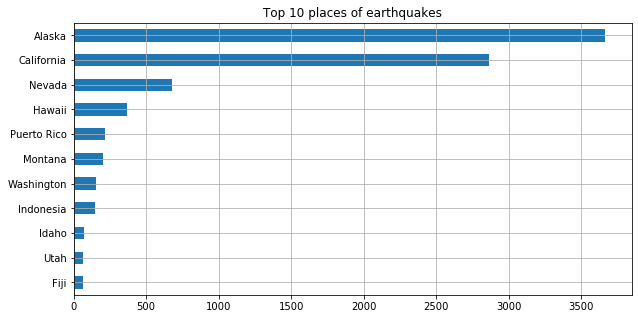

In [24]:
quakes.parsed_place.value_counts().iloc[10::-1].plot.barh(figsize=(10, 5),title='Top 10 places of earthquakes', grid=True)

Text(0.5, 0, 'Number of Tsunamis')

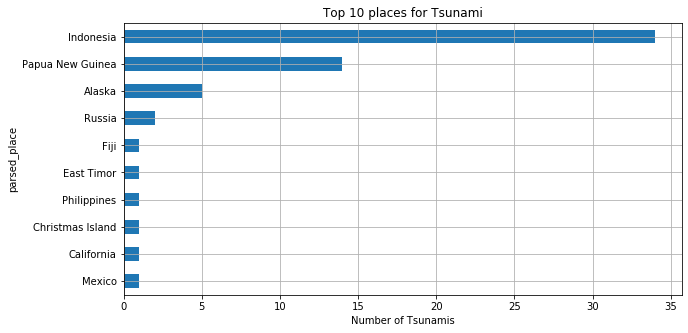

In [25]:
quakes.groupby('parsed_place').tsunami.sum().sort_values().iloc[-10::].plot.barh(figsize=(10,5), 
                                                                                 title='Top 10 places for Tsunami',
                                                                                grid=True)
plt.xlabel('Number of Tsunamis')

#### Top 4 places for earthquakes along with magnitude type with mutiple bars 

Text(0, 0.5, 'Earthquakes')

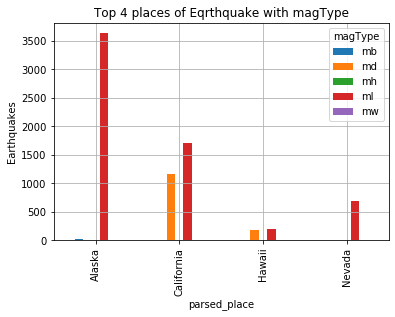

In [26]:
quakes[
    quakes.parsed_place.isin(
    ['Alaska', 'Nevada', 'California', 'Hawaii'])
      ].groupby(
    ['parsed_place', 'magType']
     ).mag.count().unstack().plot(kind='bar', title='Top 4 places of Eqrthquake with magType', grid=True)
plt.ylabel('Earthquakes')

#### Stacked Bar plot

Text(0, 0.5, 'earthquakes')

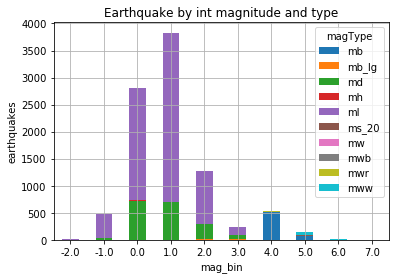

In [27]:
#Create pivot table with Magnitude as index
#For that first round off the magnitude to int using np.floor
#Pivote table will be created with count of earthquakes of magType and magnitude
pivot = quakes.assign(mag_bin = lambda x:np.floor(x.mag)).pivot_table(
    index='mag_bin', columns='magType', values='mag', aggfunc='count')

#use this pivote table to create stacked bar chart
pivot.plot.bar(stacked=True, rot=0, title='Earthquake by int magnitude and type', grid=True)
plt.ylabel('earthquakes')

#### magTypes other than `ml` and `mb` are not clearly visible
#### To corrct this, we can normalize the values 

Text(0, 0.5, 'percentage')

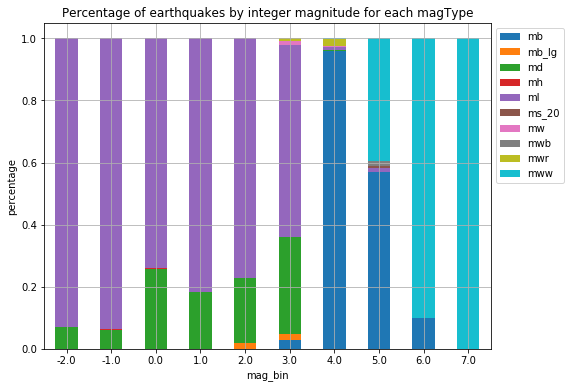

In [28]:
norm_pivot = pivot.fillna(0).apply(lambda x: x/x.sum(), axis=1) #Normalizing the values on the scale of 0 to 1
ax = norm_pivot.plot.bar(stacked=True, rot=0, figsize=(8, 6),
                         title='Percentage of earthquakes by integer magnitude '\
                                'for each magType', grid=True
                        )

#After running this, legend will be inside the box overlapping couple of the bars. Move it outside
ax.legend(bbox_to_anchor=(1,1))

plt.ylabel('percentage')

##### Matplotlib can be used for scatter matrix, heatmap, lag plot etc also. But some of these graphs can be visualized better with Seaborn


# Seaborn

In [29]:
import seaborn as sns

Matplotlib only allows numerical data for plotting but seaborn works on both numerican and categorical data

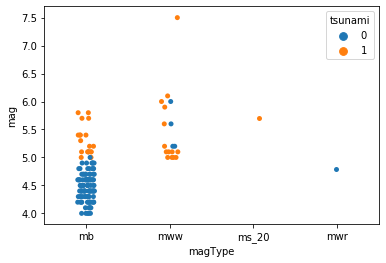

In [30]:
sns.stripplot(x='magType', y='mag', hue='tsunami', data=quakes[(quakes.parsed_place=='Indonesia')])

#### To reduce the overlap we can use the argument `jitter` or we can use `swarmplot` which not only reduced overlap as much as possible but also gives the glimpse of distribution

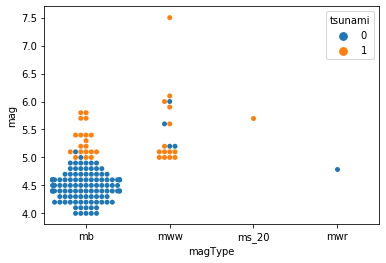

In [31]:
sns.swarmplot(x='magType', y='mag', hue='tsunami', data=quakes[(quakes.parsed_place=='Indonesia')])

### Barchart of the same dataset used in matplotlib

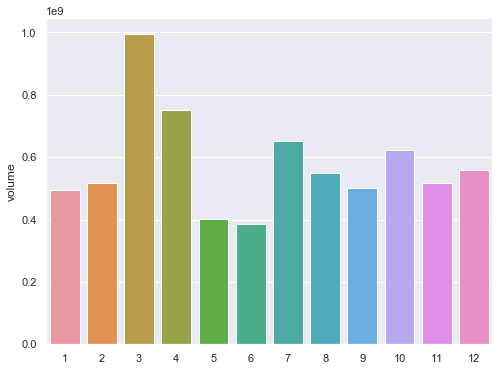

In [32]:
a = fb.assign(month = lambda x: x.index.month).groupby('month').sum().volume
sns.set(rc={'figure.figsize':(8, 6)})
sns.barplot(x=list(a.index), y=a)

### Correlations and Heatmaps

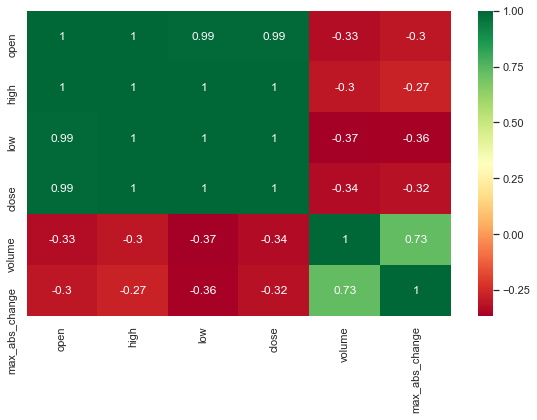

In [33]:
sns.heatmap(fb.sort_index().assign(volume=np.log(fb.volume),
            max_abs_change = fb.high - fb.low).corr(), annot=True, cmap='RdYlGn')
plt.tight_layout()

### `pairplot()` - Alternative for `scatter_matrix()` of matplotlib

#### pairplot/ scaatter_matrix is used to see the correlation between columns. pairplot provides better visualization

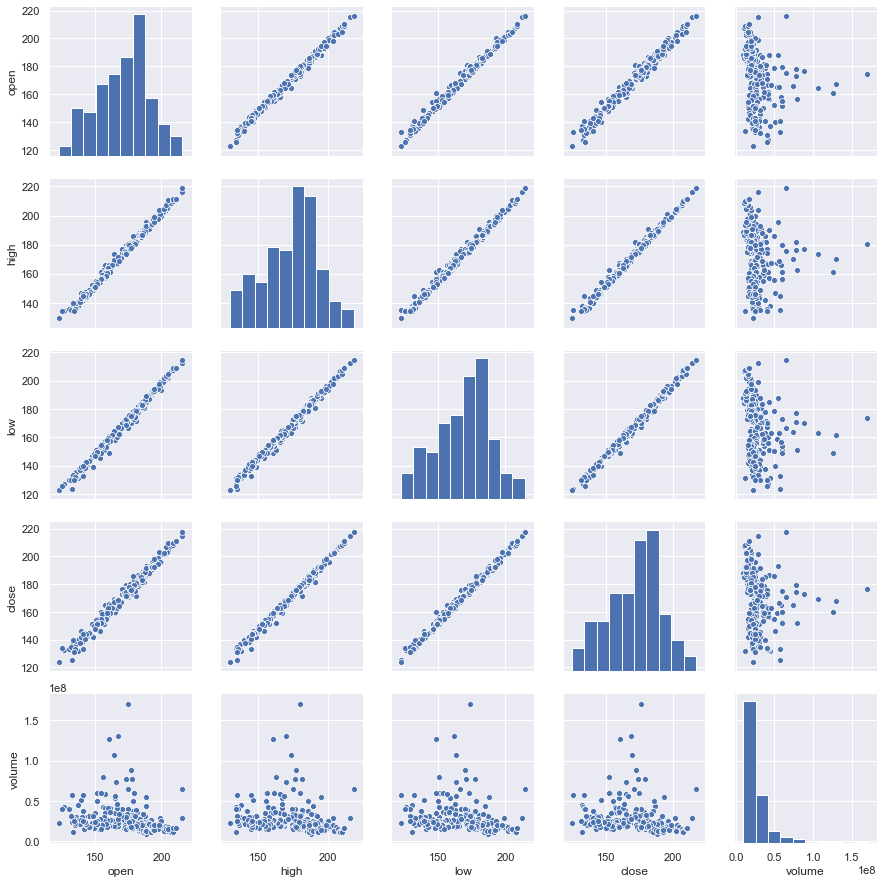

In [34]:
sns.pairplot(fb)

#### To distinguish the quarters with colors we just need to pass quarters to argument `hue` 

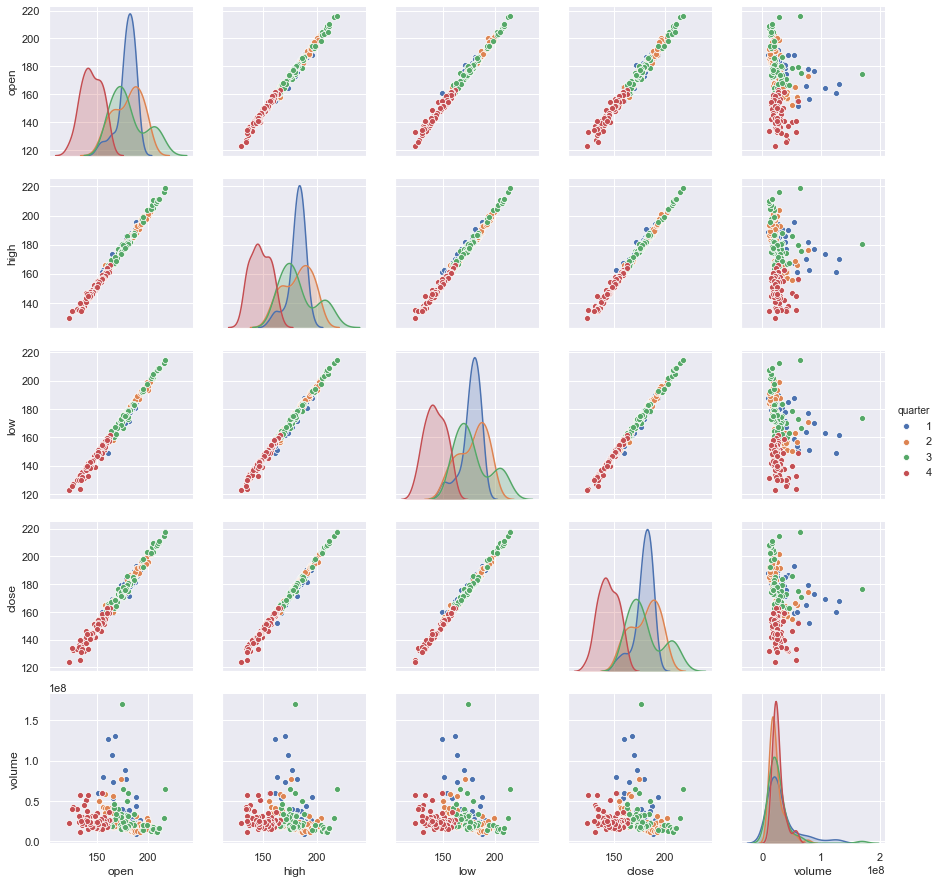

In [35]:
fb2 = fb.assign(quarter = lambda x: x.index.quarter)
sns.pairplot(fb2, hue='quarter', vars=['open','high','low','close','volume'])

#### Note: If `hue` column is string/object it won't be visible on graph. 
#### If `hue` is numerical then you need to specify the columns to use in argument `vars` which is a list of column names

pass `kind='reg'` to pairplot to display the regression line

Use `joinplot()` to compare two columns

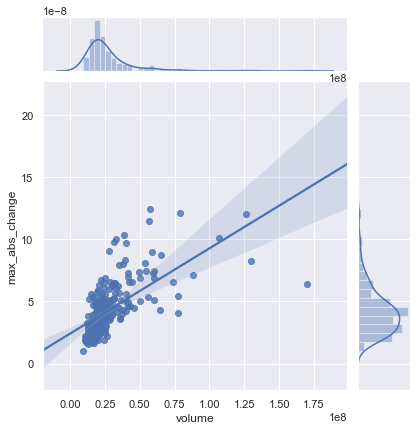

In [36]:
sns.jointplot('volume', 'max_abs_change', kind='reg', data=fb.assign(volumn=np.log(fb.volume), max_abs_change=fb.high-fb.low))

`kind='resid'` will show  residuals (value observed - value predicted) 

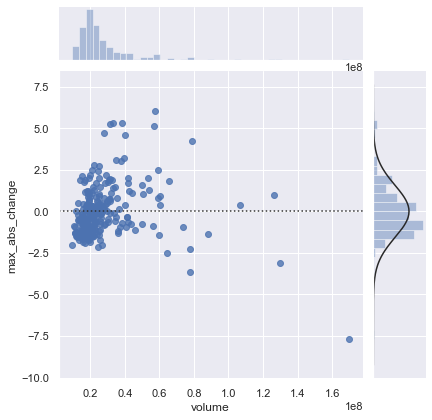

In [37]:
sns.jointplot('volume', 'max_abs_change', kind='resid', data=fb.assign(volumn=np.log(fb.volume), max_abs_change=fb.high-fb.low))

## Distribution plots

### Box plots - sns.boxenplot

Text(0.5, 1.0, 'Box plot using matplotlib')

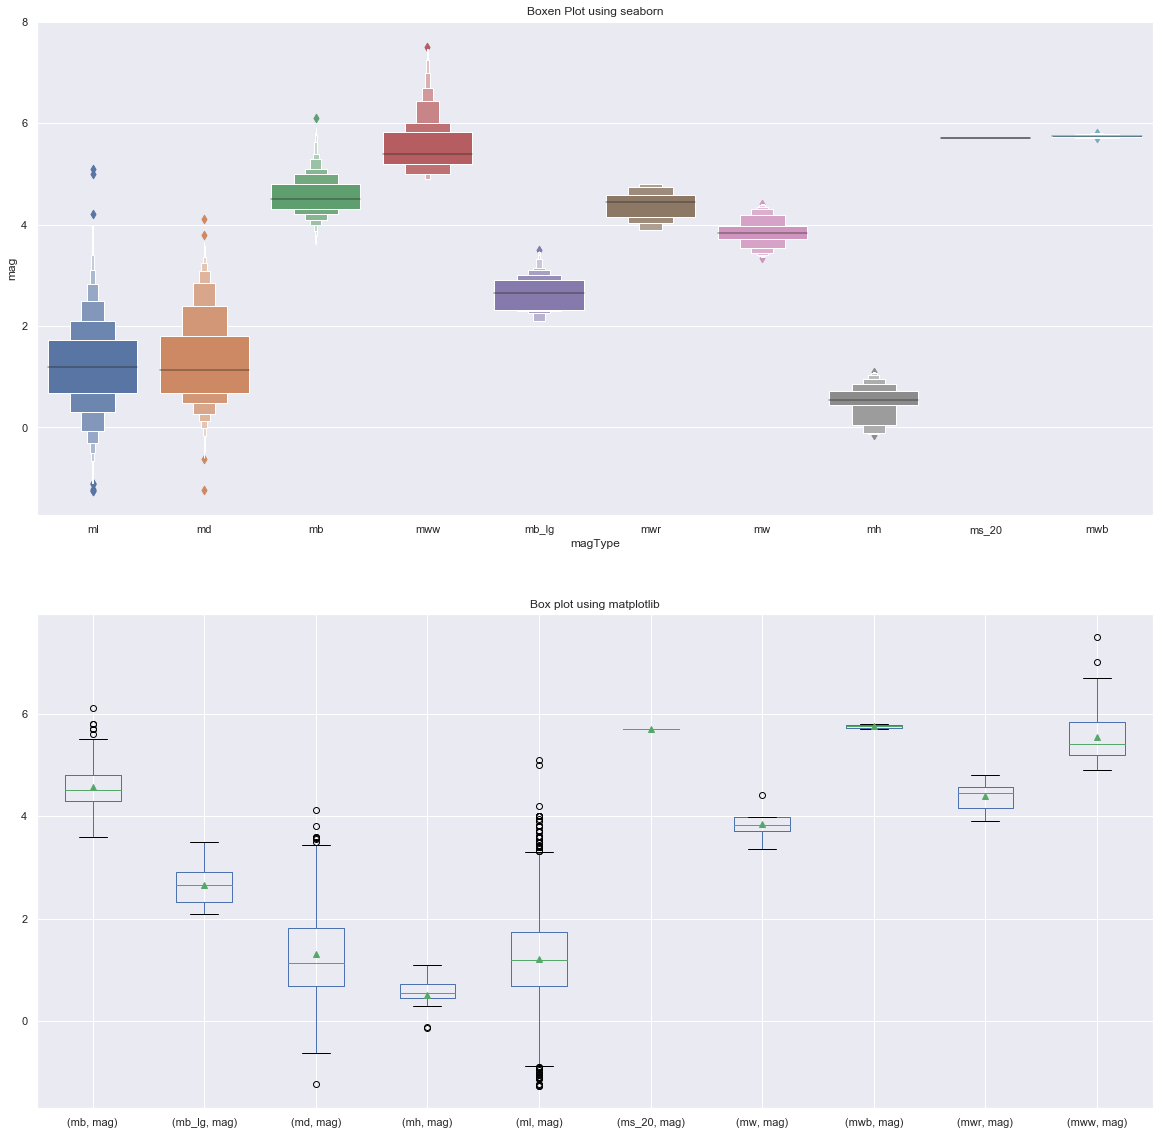

In [38]:
fig, ax = plt.subplots(2,1,figsize=(20,20))
sns.boxenplot(x='magType', y='mag', data=quakes,ax=ax[0])
ax[0].title.set_text('Boxen Plot using seaborn')
quakes[['magType', 'mag']].groupby('magType').boxplot(figsize=(17,6), subplots=False, showmeans=True, ax=ax[1])
ax[1].set_title('Box plot using matplotlib')

As said earlier, seaborn can directly work on categorical data. So unlike matplotlib, no need to group the `magType`

### Violin Plot - Combines `KDE` and `Box plot` thus providing distribution also

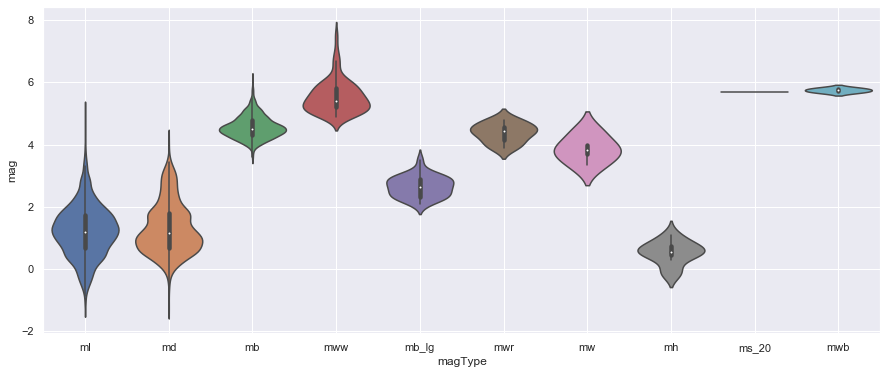

In [39]:
sns.set(rc={'figure.figsize':(15,6)})
sns.violinplot(x='magType', y='mag', scale='width', data=quakes)
plt.grid(True)
#parameter scale='width' gives same width to all violins

### `distplot` - Histogram + KDE

Text(0.5, 0.98, 'Facebook Stock Prices')

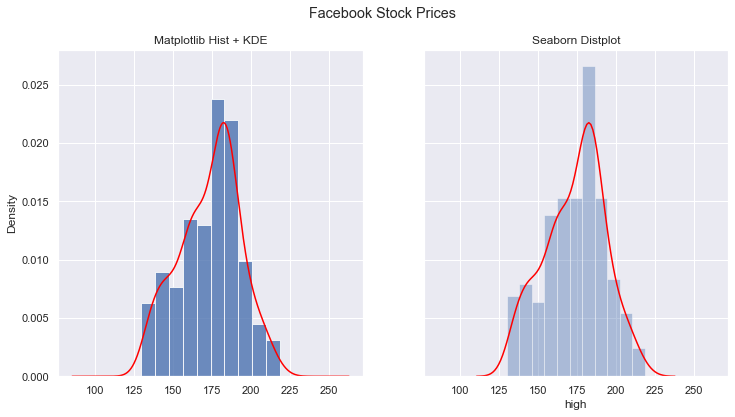

In [40]:
fig, ax = plt.subplots(1,2, figsize=(12,6), sharey=True, sharex=True)
fb.high.plot(kind='hist', density=True, alpha=0.8, ax=ax[0])
fb.high.plot(ax=ax[0], kind='kde', color='red')
ax[0].set_title('Matplotlib Hist + KDE')
sns.distplot(fb.high, kde_kws={'color':'red'}, ax=ax[1])
ax[1].title.set_text('Seaborn Distplot')
fig.suptitle('Facebook Stock Prices')

#### For `histogram` in seaborn set `kde=False` in `distplot()`

### Visualizing similar plots of Seaborn and Matplotlib together

#### Bar chart

Text(0.5, 0.98, 'Facebook Monthly Total Volume Traded')

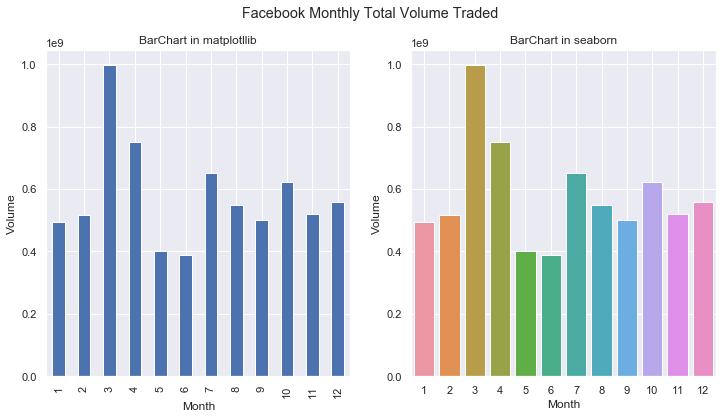

In [41]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
fb.assign(month = lambda x: x.index.month).groupby('month').sum().volume.plot.bar(grid=True, ax=ax[0])
ax[0].set_title('BarChart in matplotllib')
ax[0].set_ylabel('Volume')
ax[0].set_xlabel('Month')

a = fb.assign(month = lambda x: x.index.month).groupby('month').sum().volume
sns.barplot(x=list(a.index), y=a, ax=ax[1])
ax[1].title.set_text('BarChart in seaborn')
ax[1].set_ylabel('Volume')
ax[1].set_xlabel('Month')
ax[1].grid(True)
fig.suptitle('Facebook Monthly Total Volume Traded')

#### Scatter plot

Text(0.5, 0, 'Low')

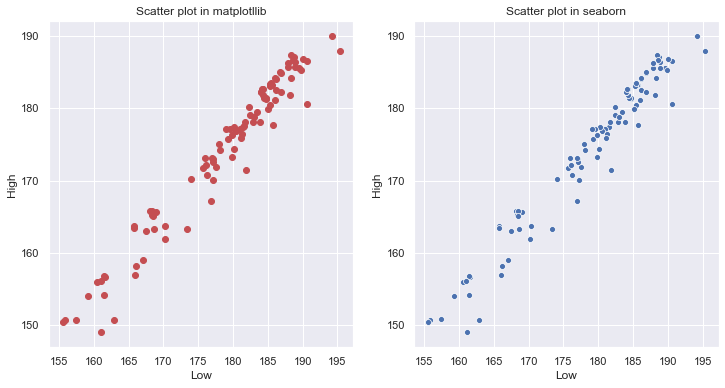

In [42]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].plot('high', 'low', 'ro', data=fb.head(100)) 
ax[0].set_title('Scatter plot in matplotllib')
ax[0].set_ylabel('High')
ax[0].set_xlabel('Low')

sns.scatterplot(x='high', y='low', data=fb.head(100), ax=ax[1])
ax[1].title.set_text('Scatter plot in seaborn')
ax[1].set_ylabel('High')
ax[1].set_xlabel('Low')

## Formatting

### Titles and Labels

Text(0, 0.5, 'Price ($)')

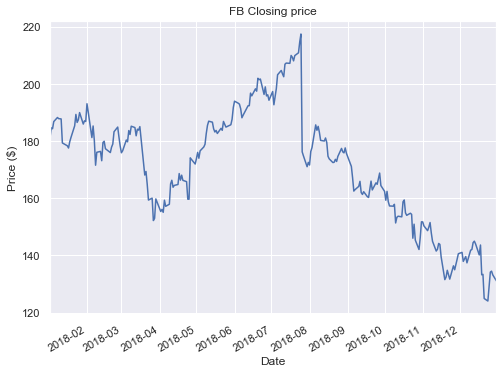

In [43]:
fb.close.plot(figsize=(8,6))
plt.title('FB Closing price') #suptitle() can also be used
plt.xlabel('Date')
plt.ylabel('Price ($)')

In case of subplots `title()` method won't work hence use `suptitle()`

Text(0, 0.5, 'Price($)')

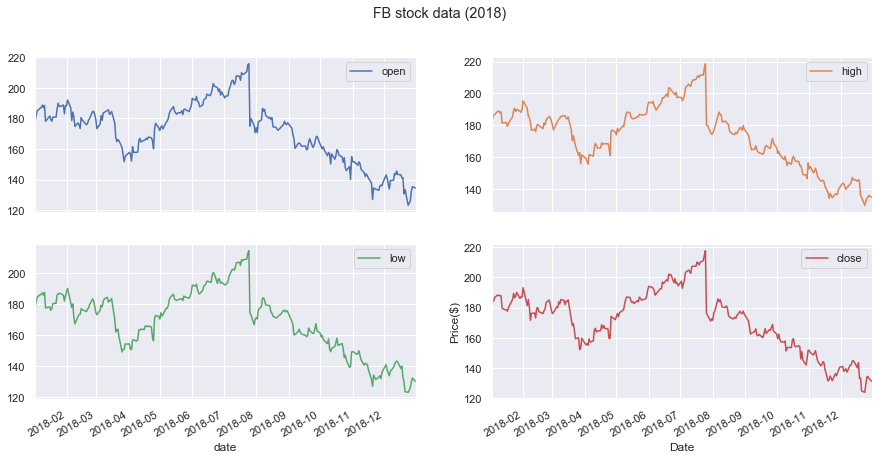

In [44]:
fb.iloc[:,:4].plot(subplots=True, layout=(2,2), figsize=(15,7), sharex=True)
plt.suptitle('FB stock data (2018)')
plt.xlabel('Date')
plt.ylabel('Price($)')

### Legends

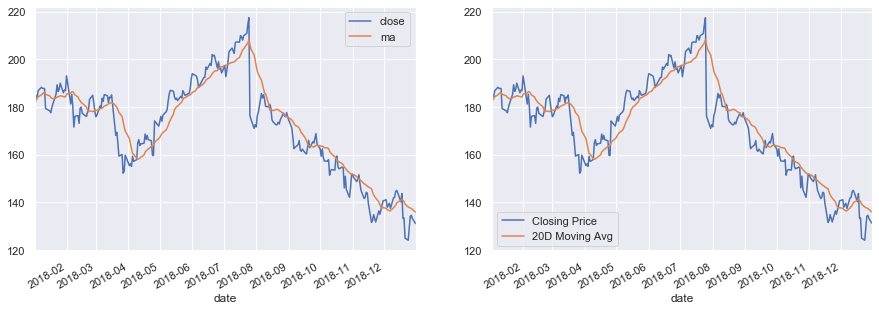

In [45]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
fb.assign(ma = lambda x: x.close.rolling('20D').mean()).plot(y=['close', 'ma'], ax=ax[0]) #20day moving avg,Automatic legend
fb.assign(ma = lambda x: x.close.rolling('20D').mean()).plot(y=['close', 'ma'],
                                                             ax=ax[1],
                                                             label=['Closing Price', '20D Moving Avg']) #20 day moving avg
ax[1].legend(loc='lower left')

### Formatting Axes

#### Setting the limits to axis `xlim() and ylim()`

(0, 220.34575)

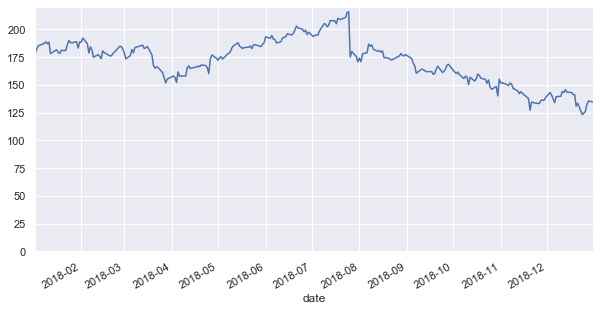

In [46]:
fb.open.plot(grid=True, figsize=(10,5))
plt.ylim(0,None)

(0, 220.34575)

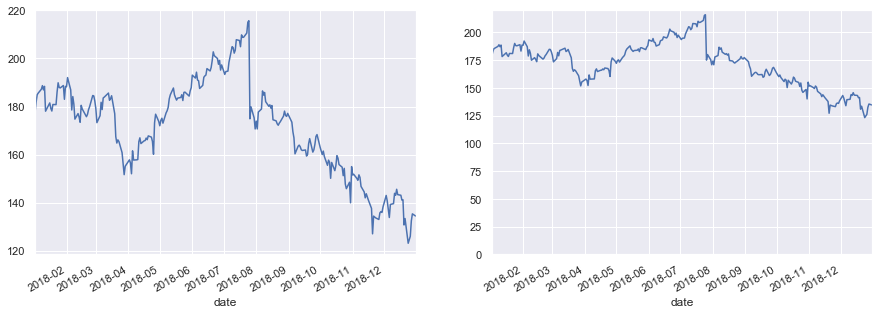

In [47]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fb.open.plot(grid=True, ax=ax[0])
fb.open.plot(grid=True, ax=ax[1])
ax[1].set_ylim(0, None)

#### Changing the scale of axis `xscale() and yscale()`

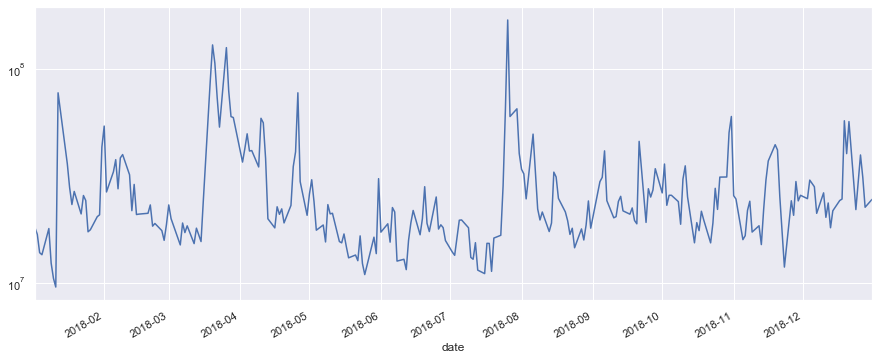

In [48]:
fb.volume.plot(grid=True)
plt.yscale('log')

### Customizing Visualizations

#### Adding Reference Lines

In Financial Analysis, we need `support` and `resistance` lines

`Support` is a level at which `downtrend` is reverse i.e. buyers tend to purchase or enter the stock
`Resistance` is a level at which `uptrend` is reversed i.e. selling is started thus the price falls

Calculation of support and resistance:
Pivote Point = (high + low + close)/3

Third Level Support = low - 2 * (high - Pivot Point)

Third Level Resistance = high + 2 * (Pivot Point - low)

All the values are calculated on previos day's data

In [49]:
last_high = fb.high.last('1D').iat[0]
last_low = fb.low.last('1D').iat[0]
last_close = fb.close.last('1D').iat[0]

pivote_point = (last_high + last_low + last_close)/3
l3_support = round(last_low - 2*(last_high - pivote_point),2)
l3_resistance = round(last_high + 2*(pivote_point - last_low),2)

In [50]:
print(l3_support, l3_resistance)

124.46 138.53


To draw the line on x axis we will use `axhline` function. It can be used either on `plt like plt.axhline()` or `Axes object`

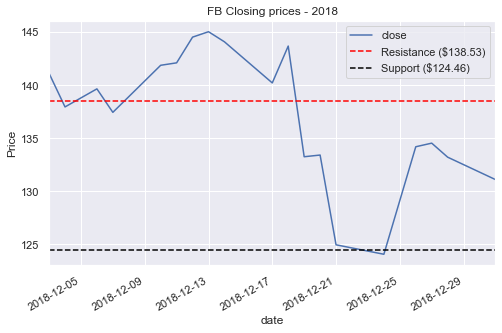

In [51]:
fb['2018-12'].close.plot(title='FB Closing prices - 2018', grid=True, figsize=(8,5))
plt.axhline(y=l3_resistance, color='red', linestyle='--',
            label = f'Resistance (${l3_resistance})')
plt.axhline(y=l3_support, color='black', linestyle='--',
            label = f'Support (${l3_support})')
plt.ylabel('Price')
plt.legend()

for vertical line we can use `axvline`

Text(0.5, 0, 'Magnitue')

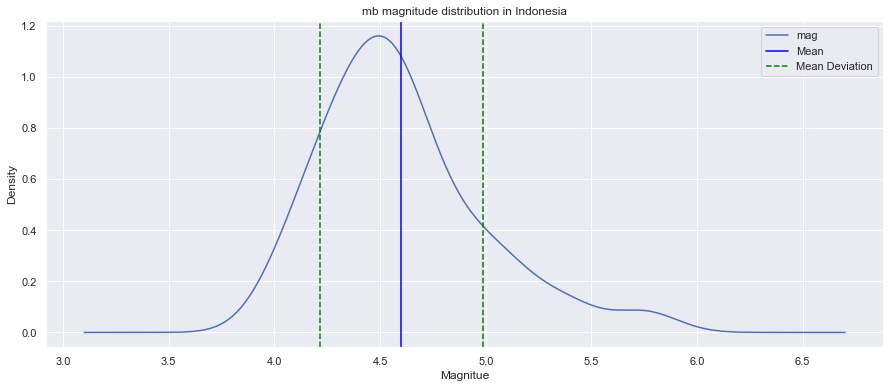

In [52]:
vline = quakes.query('magType=="mb" and parsed_place=="Indonesia"').mag
mag_mean = vline.mean()
mag_std=vline.std()
vline.plot(kind='kde', title='mb magnitude distribution in Indonesia')
plt.axvline(mag_mean, color='blue', label='Mean')
lt_std = mag_mean - mag_std
rt_std = mag_mean + mag_std
plt.axvline(lt_std, color='green',linestyle='--', label='Mean Deviation')
plt.axvline(rt_std, color='green',linestyle='--')
plt.grid(True)
plt.legend()
plt.xlabel('Magnitue')

#### Shading Regions
Area between two line can be shaded with `axvspan()` and `axhspan()` 

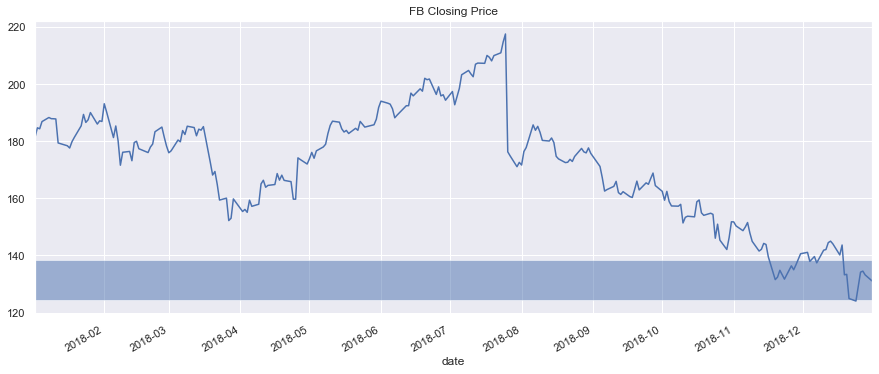

In [53]:
fb.close.plot(title='FB Closing Price').axhspan(l3_support, l3_resistance, alpha=0.5)

Area between two curves can be shaded with `fill_between()` and `fill_betweenx()`

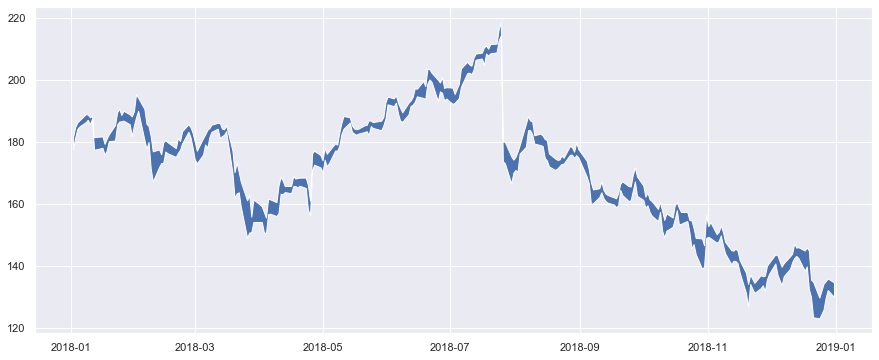

In [55]:
plt.fill_between(fb.index, fb.high, fb.low)

using `where` argument, specific area can be filled

Text(0, 0.5, 'Price')

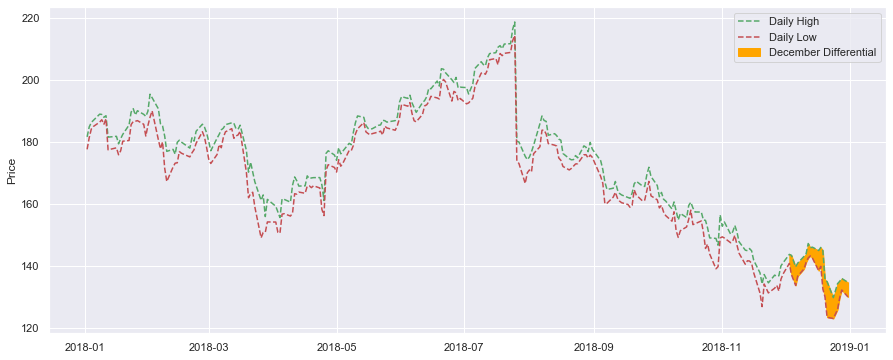

In [56]:
plt.fill_between(fb.index, fb.high, fb.low, where=fb.index.month==12, color='orange', label='December Differential')
plt.plot(fb.index, fb.high, 'g--', label='Daily High')
plt.plot(fb.index, fb.low, 'r--', label='Daily Low')
plt.legend()
plt.grid(True)
plt.ylabel('Price')

`fill_between` takes 1 `x` value and 2 `y` values.
To shade opposite, we can use `fill_betweenx`

#### Annotations

To annotate the specific point in graph `plt.annotate` is used

Text(2018-12-01, 160, 'Resistance = 138.53')

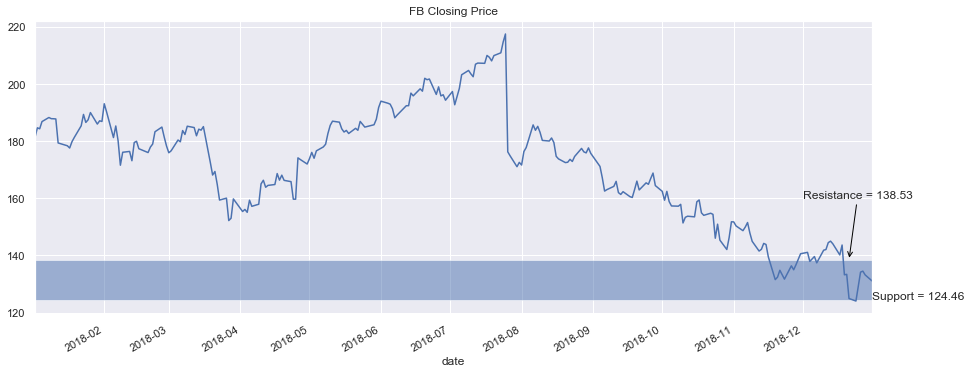

In [75]:
ax = fb.close.plot(title='FB Closing Price').axhspan(l3_support, l3_resistance, alpha=0.5)
plt.annotate(f'Support = {l3_support:.2f}',
             xy=('2018-12-31', l3_support),
             
            )
plt.annotate(f'Resistance = {l3_resistance:.2f}',
            xy=('2018-12-21',l3_resistance),
            xytext=('2018-12-01', 160),
            arrowprops={'arrowstyle' : '->', 'color':'black'}
            )

Annotating drop of price

Text(2018-08-20, 194.695, '-0.20')

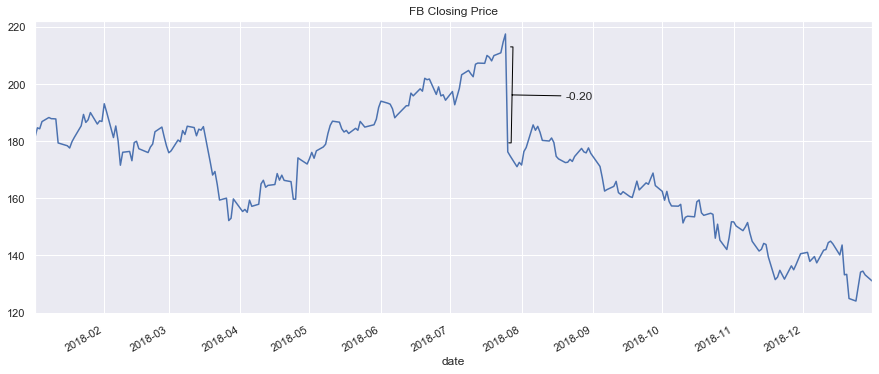

In [81]:
close_price = fb.loc['2018-07-25', 'close']
open_price = fb.loc['2018-07-26', 'open']
drop = (open_price-close_price)/close_price
fb.close.plot(title='FB Closing Price')
plt.annotate(f'{drop:.2f}',
            xy=('2018-07-27',(open_price + close_price)/2),
            xytext=('2018-08-20', (open_price + close_price)/2 - 1.5), 
            arrowprops=dict(arrowstyle='-[,widthB=4.0,lengthB=0.2',color='black'),
            
            )